In [1]:
import tensorflow as tf
# tf.enable_eager_execution()
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
# from hilbert import hilbertCurve
import imgaug.augmenters as iaa
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras import models,layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.transform import rotate,rescale
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage
import numpy as np
import sklearn
import seaborn as sns
import nbformat
import plotly.express as px
import tensorflow_addons as tfa

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3925870226024264028
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1755224475
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15608442065676762027
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [136]:
!pip3 freeze

absl-py==1.4.0
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1670263926556/work
astunparse==1.6.3
attrs==22.2.0
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_artifacts/backports.functools_lru_cache_1618230623929/work
cachetools==5.3.0
certifi==2022.12.7
charset-normalizer==3.1.0
cloudpickle==2.2.1
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1666700638685/work
contourpy==1.0.7
cycler==0.11.0
debugpy @ file:///C:/ci/debugpy_1637091961445/work
decorator @ file:///home/conda/feedstock_root/build_artifacts/decorator_1641555617451/work
Deprecated==1.2.13
executing @ file:///home/conda/feedstock_root/build_artifacts/executing_1667317341051/work
fastjsonschema==2.16.3
flatbuffers==23.3.3
fonttools==4.39.3
gast==0.4.0
google-auth==2.17.1
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
grpcio==1.53.0
h5py==3.1.0
idna==3.4
imageio==

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [3]:
label = ['05' ,  '06' , '07' , '08' , '09' , '10' , '11' ,'16' , '17' , '18' , '19']

dirname1 = []
filename1 = []
fullpath = []
for dirname, _, filenames in os.walk("C:/Users/avina/Downloads/77"):
    for filename in filenames:
        dirname1.append((dirname))
        filename1.append(filename)
        fullpath.append((os.path.join(dirname, filename)))


df = pd.DataFrame(columns=['path' , 'label' ])
label1 = []
path = []
def create_dataframe(fullpath,label):
            
    for i in range(len(fullpath)):
        for j in range(len(label)):
            if (fullpath[i].split('/')[4][29:31]== label[j]):
                path.append(fullpath[i])
                label1.append(label[j])
    
           
    return path,label1  

path,label2=create_dataframe(fullpath,label)
df['path'] = path
df['label'] = label2
final = pd.DataFrame(df)
final.iloc[638]

path     C:/Users/avina/Downloads/77\activity_spectogra...
label                                                   19
Name: 638, dtype: object

In [4]:
labelname = []
classvalue = []

for i in range(len(df)):
    for j in range(len(label)):
        if (df['label'][i] ==  label[j]):
            if (label[j] == '05'):
                labelname.append('Walkingtowards')
                classvalue.append('00')
            elif (label[j] =='06'):
                labelname.append('walkingaway')
                classvalue.append('01')
            elif (label[j] =='07'):
                labelname.append('pickingobject')
                classvalue.append('02')
            elif (label[j] =='08'):
                labelname.append('bending')
                classvalue.append('03')
            elif (label[j] =='09'):
                labelname.append('sitting')
                classvalue.append('04')
            elif (label[j] =='10'):
                labelname.append('kneeling')
                classvalue.append('05')
            elif (label[j] =='11'):
                labelname.append('crawling')
                classvalue.append('06')
            elif (label[j] =='16'):
                labelname.append('walkingontoes')
                classvalue.append('07')
            elif (label[j] =='17'):
                labelname.append('limping')
                classvalue.append('08')
            elif (label[j] =='18'):
                labelname.append('shortsteps')
                classvalue.append('09')
            else :
                labelname.append('scissorsgait')
                classvalue.append('10')

df['labelname'] = labelname
df['classvalue'] = classvalue



for i in range(len(df)-1):
    path = df['path'].iloc[i]
    if(path == 'C:/Users/avina/Downloads/77\\activity_spectogram_77GHz\\08_bending\\activity_spectogram_77GHz - Shortcut.lnk'):
        df.drop(index = i,axis =0,inplace = True)
        print('del')


del


In [5]:
y_train = df['classvalue']
y_train
y_train = y_train.to_numpy()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(df,y_train, test_size = 0.20 , shuffle = True,random_state = 42,stratify=y_train)

In [6]:
fig = px.histogram(x_test, x=y_test)
fig.show()

In [7]:
def create_data(x_train,y_train):
    listimage = []
    
    for i in range(len(x_train)):
        path = x_train['path'].iloc[i]

        image = cv2.imread(path)
        image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
        #image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
     
        listimage.append(image)
       
            
    
    return  listimage

x_train_resize = create_data(x_train,y_train)

x_train_resize_1 = np.array(x_train_resize)


len(x_train_resize_1)

x_test_resize = create_data(x_test,y_test)

x_test_resize_1 = np.array(x_test_resize)

In [8]:
aug1 = iaa.GaussianBlur(sigma = (0,1))
aug10 = iaa.AdditiveGaussianNoise(loc = 0 , scale = (0,1) , per_channel= True )
aug2 = iaa.Emboss(alpha = (1), strength = 1.5)
aug3 = iaa.Sharpen(alpha = (1.0) , lightness = (1.5))
aug4 = iaa.Crop(px=(0, 16))
#aug5 = iaa.ShearX((-20, 20))
aug6 = iaa.ImpulseNoise(0.1)
#aug7 = iaa.ScaleX((0.5, 1.5))
aug8 = iaa.LinearContrast((0.4, 1.6))
#aug9 = iaa.Solarize(0.5, threshold=(32, 128))

In [9]:
def augment(data,data1):
    aug_X_train = []
    aug_y_train = []
    for i  in range(len(data)):
        aug_X_train.append(data[i])
        
        aug_X_train.append(aug1.augment_image(data[i]))
        aug_X_train.append(aug10.augment_image(data[i]))
        aug_X_train.append(aug3.augment_image(data[i]))
       
        aug_X_train.append(aug6.augment_image(data[i]))
        
        
        for j in range(5):
            aug_y_train.append(data1[i])


    return   aug_X_train,aug_y_train


x_train_aug,aug_y_train = augment(x_train_resize_1,y_train)
len(x_train_aug),len(aug_y_train),type(x_train_aug), type(aug_y_train)
x_train_aug_2 = np.array(x_train_aug,dtype = 'float32')

aug_y_train_1 = np.array(aug_y_train ,dtype ='float32')
y_test = np.array(y_test ,dtype ='float32')

In [10]:
def normalization(train,test):
    mean = np.mean(train)
    std = np.mean(test)
    train = (train - mean)/std
    test = (test -mean)/std
    return train,test

In [11]:
x_train,x_test = normalization(x_train_aug_2,x_test_resize_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

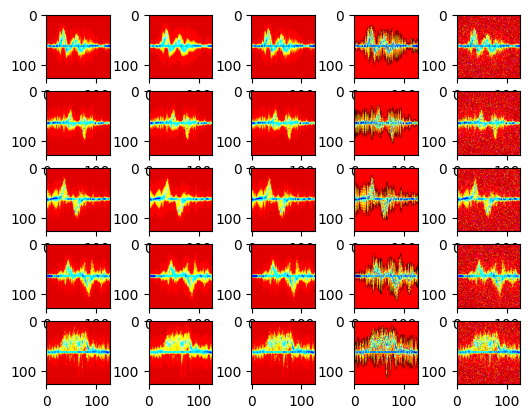

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

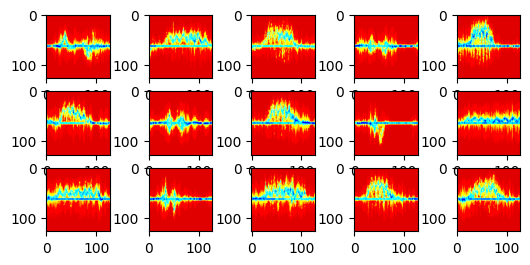

In [12]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow((x_train[i]))

plt.show()


for i in range(15):
  plt.subplot(5,5,i+1)
  plt.imshow(x_test[i])

plt.show()

In [13]:
x_train.shape , np.mean(x_train), np.mean(x_test) , np.var(x_train) , np.var(x_test)

((2590, 128, 128, 3), 1.0712669e-06, -0.053301394, 1.6950374, 1.5075747)

In [14]:
from tensorflow.keras import layers
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import tensorflow as tf
import numpy as np


In [15]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 128
num_epochs = 10

def activation_block(x):
    return layers.BatchNormalization()(layers.Activation("relu")(x))


def conv_stem(x, filters:int, patch_size:int):
    x = layers.Conv2D(filters,kernel_size = patch_size, strides = patch_size)(x)
    return activation_block(x)


def conv_mixer_block(x,filters:int,kernel_size:int):
    x0=x
    x = layers.DepthwiseConv2D(kernel_size = kernel_size , padding ='same')(x)
    #x = layers.Dropout(0.5)(x)
    x = layers.Add()([activation_block(x),x0])
    
    x = layers.Conv2D(filters, kernel_size =1)(x)
    x=activation_block(x)
    return x


def get_conv_mixer_256_8(image_size =72,filters =128 , depth=2,kernel_size =5,patch_size=2,num_classes=11):
    inputs = keras.Input((128,128,3))
    x = conv_stem(inputs,filters,patch_size)
    for _ in range(depth):
        x = conv_mixer_block(x,filters,kernel_size)
    x = layers.GlobalAvgPool2D()(x)
    #x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)


conv_mixer_model = get_conv_mixer_256_8()
conv_mixer_model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 128)  1664        ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 64, 64, 128)  0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 128)  512        ['activation[0][0]']         

In [16]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)
batch_size = 64
no_epochs = 50
verbosity = 1

fold_no = 1
i =1
acc_hist = []
hist_hist = []
acc_per_fold = []
loss_per_fold = []
from tensorflow.keras.callbacks import ModelCheckpoint

In [17]:
callbacks = [ModelCheckpoint('C:/Users/avina/HAR_END_TO_END./model_128_STRATIFY_{epoch:4d}_val_accuracy{val_accuracy:.5f}_val_loss{val_loss:.5f}.h5', save_best_only=True, mode = 'max',  monitor='val_accuracy' )]

In [18]:
conv_mixer_model.compile(
        optimizer = keras.optimizers.Adam(lr=1e-03, decay=1e-6),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

c:\Users\avina\Anaconda\envs\tf_212\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [17]:
#conv_mixer_model.compile(
#        optimizer = tfa.optimizers.ConditionalGradient(
#        learning_rate=0.99949, lambda_=203),
#        loss="sparse_categorical_crossentropy",
#        metrics=["accuracy"],
#    )

In [18]:
history = conv_mixer_model.fit(x_train, aug_y_train_1,
              
              epochs=1000,validation_data = (x_test,y_test),
              verbose=verbosity , callbacks = callbacks)

Epoch 1/1000
81/81 [==============================] - 25s 116ms/step - loss: 2.0291 - accuracy: 0.2749 - val_loss: 2.6135 - val_accuracy: 0.1000
Epoch 2/1000
81/81 [==============================] - 9s 106ms/step - loss: 1.5363 - accuracy: 0.4734 - val_loss: 3.6283 - val_accuracy: 0.0846
Epoch 3/1000
81/81 [==============================] - 9s 106ms/step - loss: 1.1846 - accuracy: 0.6181 - val_loss: 4.4344 - val_accuracy: 0.0846
Epoch 4/1000
81/81 [==============================] - 9s 108ms/step - loss: 0.9658 - accuracy: 0.6892 - val_loss: 4.7671 - val_accuracy: 0.1077
Epoch 5/1000
81/81 [==============================] - 9s 107ms/step - loss: 0.8322 - accuracy: 0.7479 - val_loss: 3.5207 - val_accuracy: 0.1231
Epoch 6/1000
81/81 [==============================] - 9s 110ms/step - loss: 0.7363 - accuracy: 0.7768 - val_loss: 3.6372 - val_accuracy: 0.1308
Epoch 7/1000
81/81 [==============================] - 9s 112ms/step - loss: 0.6729 - accuracy: 0.7915 - val_loss: 1.6219 - val_accuracy

KeyboardInterrupt: 

5/5 [==============================] - 5s 37ms/step


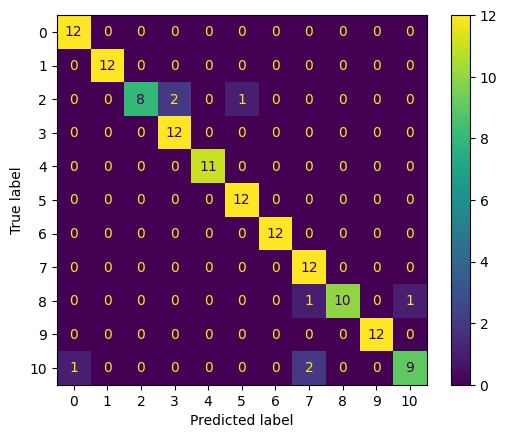

In [19]:
model = tf.keras.models.load_model('C:/Users/avina/HAR_END_TO_END\model_128_STRATIFY_ 112_val_accuracy0.93846_val_loss0.31000.h5')
predictions = np.argmax(model.predict(x_test),axis=1)
labels = ['0','1','2','3','4','5','6','7','8','9','10']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=labels)
disp.plot()

plt.show()

In [20]:
from sklearn.metrics import precision_recall_fscore_support
_, recall, _, _ = precision_recall_fscore_support(y_test, np.argmax(model.predict(x_test),axis=1))
recall

5/5 [==============================] - 0s 34ms/step


array([1.        , 1.        , 0.72727273, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.83333333, 1.        ,
       0.75      ])

5/5 [==============================] - 0s 34ms/step


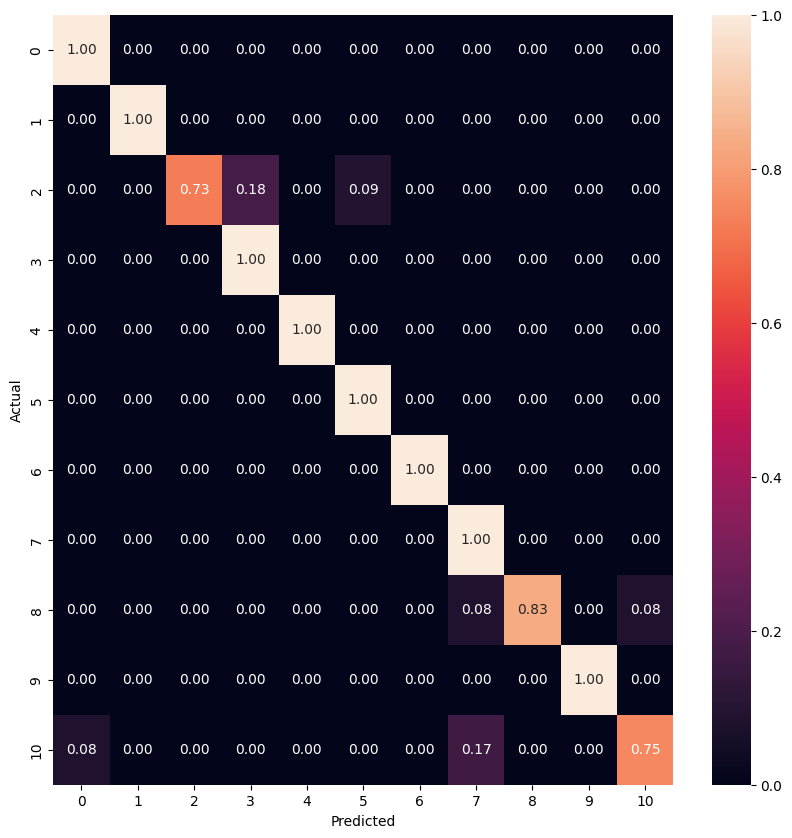

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, np.argmax(model.predict(x_test),axis=1))
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

****# Visualizations****

GradCAm

In [22]:
np.where(y_test == 2),np.where(np.argmax(model.predict(x_test),axis=1)==2)

5/5 [==============================] - 0s 105ms/step


((array([ 11,  36,  38,  52,  58,  71,  76,  78,  80, 110, 113], dtype=int64),),
 (array([ 11,  38,  52,  58,  71,  78,  80, 113], dtype=int64),))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


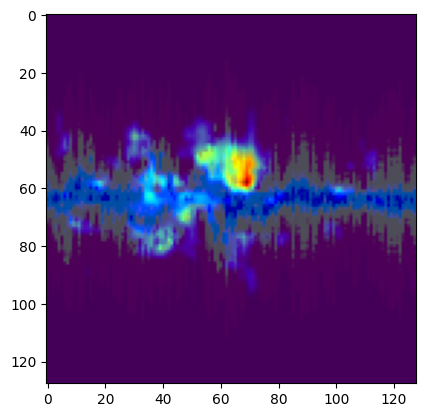

In [23]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from matplotlib import cm

# Create GradCAM++ object
gradcam = GradcamPlusPlus(model,
                          model_modifier=ReplaceToLinear(),
                          clone=True)

# Generate cam with GradCAM++
cam = gradcam(CategoricalScore(2),x_test[76])

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

plt.imshow(x_test[76])
heatmap =  np.uint8(cm.jet(cam[0])[..., :3] * 255)
plt.imshow(heatmap, cmap='jet', alpha=0.7) # overlay

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


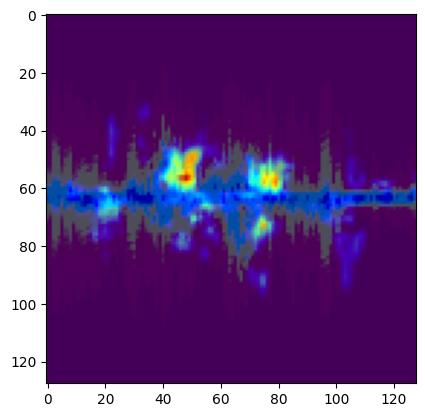

In [24]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from matplotlib import cm

# Create GradCAM++ object
gradcam = GradcamPlusPlus(model,
                          model_modifier=ReplaceToLinear(),
                          clone=True)

# Generate cam with GradCAM++
cam = gradcam(CategoricalScore(2),x_test[58])

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

plt.imshow(x_test[58])
heatmap =  np.uint8(cm.jet(cam[0])[..., :3] * 255)
plt.imshow(heatmap, cmap='jet', alpha=0.7) # overlay

ScoreCAM

In [25]:
np.where(y_test == 2),np.where(np.argmax(model.predict(x_test),axis=1)==2)

5/5 [==============================] - 0s 63ms/step


((array([ 11,  36,  38,  52,  58,  71,  76,  78,  80, 110, 113], dtype=int64),),
 (array([ 11,  38,  52,  58,  71,  78,  80, 113], dtype=int64),))

4/4 [==============================] - 0s 42ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


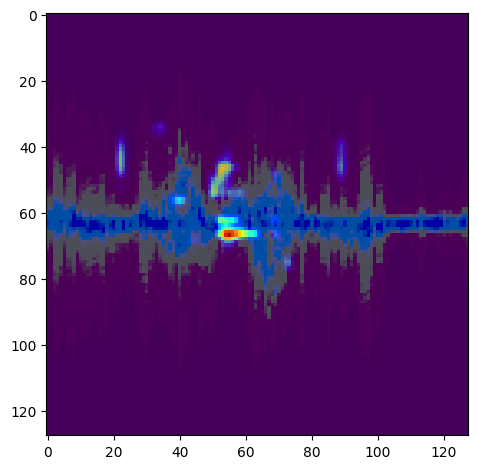

In [26]:
from tf_keras_vis.scorecam import Scorecam
#from tf_keras_vis.utils import num_of_gpus

# Create ScoreCAM object
scorecam = Scorecam(model,
                          model_modifier=ReplaceToLinear(),
                          clone=True)

# Generate heatmap with ScoreCAM
cam = scorecam(CategoricalScore(2),x_test[58])

heatmap =  np.uint8(cm.jet(cam[0])[..., :3] * 255)

plt.imshow(x_test[58])
plt.imshow(heatmap, cmap='jet', alpha=0.7)
   
plt.tight_layout()
#plt.savefig('images/gradcam_plus_plus.png')
plt.show()

4/4 [==============================] - 0s 34ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


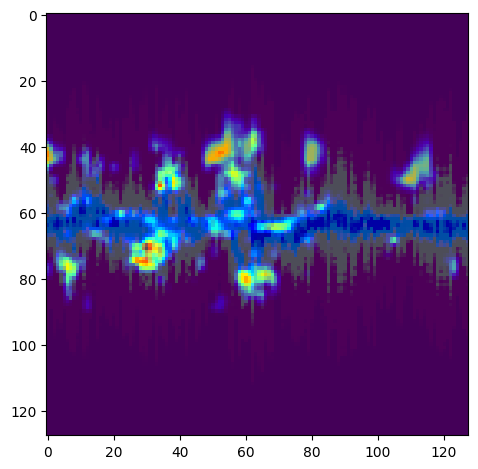

In [27]:
from tf_keras_vis.scorecam import Scorecam
#from tf_keras_vis.utils import num_of_gpus

# Create ScoreCAM object
scorecam = Scorecam(model,
                          model_modifier=ReplaceToLinear(),
                          clone=True)

# Generate heatmap with ScoreCAM
cam = scorecam(CategoricalScore(2),x_test[76])

heatmap =  np.uint8(cm.jet(cam[0])[..., :3] * 255)

plt.imshow(x_test[76])
plt.imshow(heatmap, cmap='jet', alpha=0.7)
   
plt.tight_layout()
#plt.savefig('images/gradcam_plus_plus.png')
plt.show()

Saliency Map

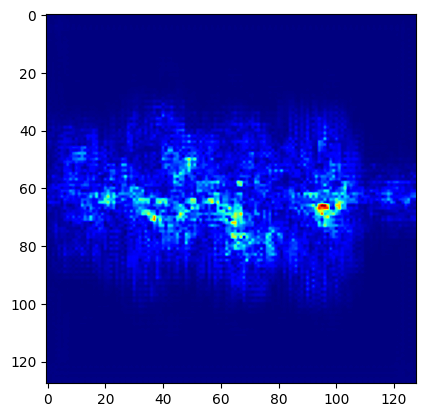

In [28]:
from tf_keras_vis.saliency import Saliency
# from tf_keras_vis.utils import normalize

# Create Saliency object.
saliency = Saliency(model,
                    model_modifier=ReplaceToLinear(),
                    clone=True)

# Generate saliency map
saliency_map = saliency(CategoricalScore(2),x_test[58])

## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
plt.imshow(saliency_map[0], cmap='jet')
plt.show()

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 128)  1664        ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 64, 64, 128)  0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 128)  512        ['activation[0][0]']         

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


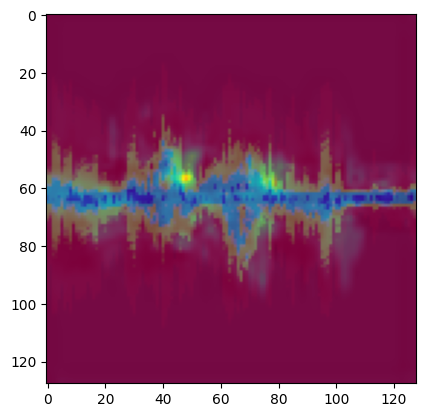

In [30]:
last_conv_layer = "batch_normalization_4"
grad_model = tf.keras.models.Model([model.inputs],[model.get_layer(last_conv_layer).output,model.output])
img_array = x_test[58]
img_array = np.expand_dims(img_array, axis=0)
pred_index = None
with tf.GradientTape() as tape:
    last_conv_layer_output,preds = grad_model(img_array)
    if pred_index is None:
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:,pred_index]
 
    
grads = tape.gradient(class_channel,last_conv_layer_output)[0]
last_conv_layer_output = last_conv_layer_output[0]



guided_grads = (
    tf.cast(last_conv_layer_output > 0, "float32")
    * tf.cast(grads > 0, "float32")
    * grads
)

pooled_guided_grads = tf.reduce_mean(guided_grads, axis=(0, 1))
guided_gradcam = np.ones(last_conv_layer_output.shape[:2], dtype=np.float32)

for i, w in enumerate(pooled_guided_grads):
    guided_gradcam += w * last_conv_layer_output[:, :, i]
    
guided_gradcam = cv2.resize(guided_gradcam.numpy(), (128,128))

guided_gradcam = np.clip(guided_gradcam, 0, np.max(guided_gradcam))
guided_gradcam = (guided_gradcam - guided_gradcam.min()) / (
    guided_gradcam.max() - guided_gradcam.min()
)

plt.imshow(x_test[58])
plt.imshow(guided_gradcam, alpha=0.7)

Guided Backprop

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


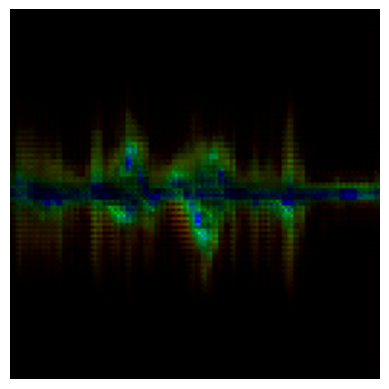

In [31]:
x = np.expand_dims(x_test[58], axis=0)
gb_model = tf.keras.models.Model(
    inputs = [model.inputs],    
    outputs = [model.get_layer('conv2d_2').output]
)
layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer,'activation')]


@tf.custom_gradient
def guidedRelu(a):
  def grad(dy):
    return tf.cast(dy>0,"float32") * tf.cast(a>0, "float32") * dy
  return tf.nn.relu(a), grad



for l in layer_dict:
    if l.activation == tf.keras.activations.relu:
        l.activation = guidedRelu
        
        
with tf.GradientTape() as tp:
    inputs = tf.cast(x, tf.float32)
    tp.watch(inputs)
    outputs = gb_model(inputs)[0]
grads = tp.gradient(outputs,inputs)[0]


gb_prop = grads
guided_back_viz = np.dstack((
            gb_prop[:, :, 0],
            gb_prop[:, :, 1],
            gb_prop[:, :, 2],
    
        )) 
#guided_back_viz -= np.min(guided_back_viz)
guided_back_viz /= guided_back_viz.max()
    
imgplot = plt.imshow(guided_back_viz,cmap=plt.cm.Reds,vmin=0, vmax=2, alpha=1)
plt.axis("off")
plt.show()

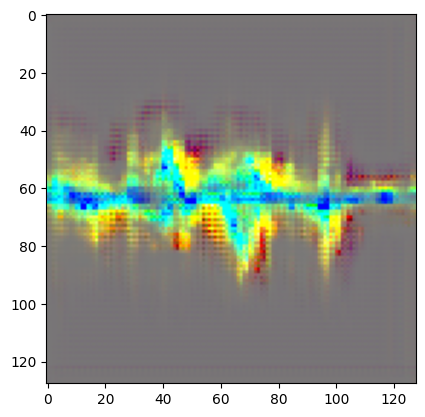

In [32]:
saliency_map = guided_back_viz#gb.guided_backprop(image[np.newaxis, ...]).numpy()
saliency_map = saliency_map * np.repeat(guided_gradcam[..., np.newaxis], 3, axis=2)

saliency_map -= saliency_map.mean()
saliency_map /= saliency_map.std() + tf.keras.backend.epsilon()
saliency_map *= 0.25
saliency_map += 0.5
saliency_map = np.clip(saliency_map, 0, 1)
saliency_map *= (2 ** 8) - 1
#saliency_map = saliency_map.astype(np.uint8)
saliency_map = saliency_map.astype(np.uint8)

plt.imshow(saliency_map)

In [33]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [34]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer(random_state=123)

In [35]:
import skimage
from skimage.color import gray2rgb, rgb2gray

def make_prediction(color_img):
    preds = model.predict(color_img)
    return preds

colored_image = gray2rgb(x_test[58].squeeze())

preds = model.predict(x_test)

preds.shape

5/5 [==============================] - 1s 112ms/step


(130, 11)

In [36]:
classes =  np.unique(y_test)
class_labels = ["Walkingtowards","walkingaway","pickingobject","bending","sitting","kneeling","crawling","walkingontoes","limping","shortsteps", "scissorsgait"]

In [37]:
from skimage.segmentation import felzenszwalb, flood_fill, flood

rng = np.random.RandomState(42)
idx = rng.choice(range(len(x_test)))
mapping = dict(zip(classes, class_labels))
print("Actual Target Value     : {}".format(mapping[y_test[idx]]))
pred = model.predict(x_test[idx:idx+1]).argmax(axis=1)[0]
print("Predicted Target Values : {}".format(mapping[pred]))

explanation = explainer.explain_instance(x_test[idx].squeeze(), make_prediction, random_seed=123)

explanation

Actual Target Value     : bending
1/1 [==============================] - 0s 48ms/step
Predicted Target Values : bending


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


In [38]:
y_test[idx]

3.0

In [39]:
img, mask = explanation.get_image_and_mask(y_test[idx], positive_only=True, hide_rest=True)
img.shape, mask.shape

((128, 128, 3), (128, 128))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


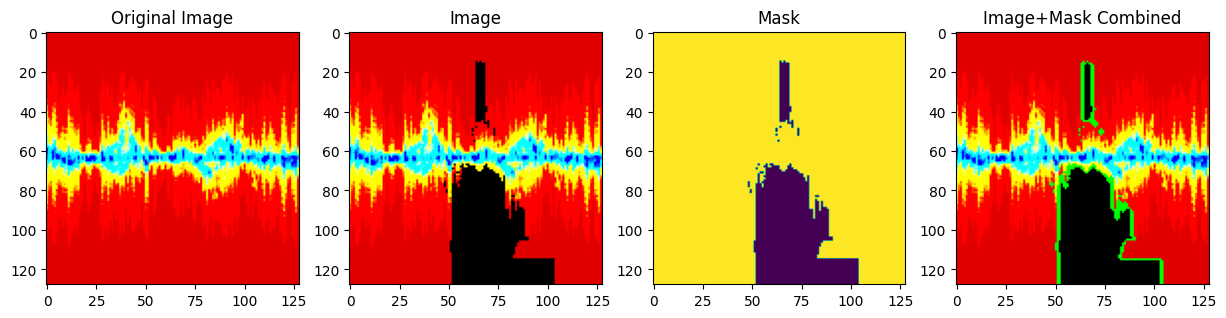

In [40]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

def plot_comparison(main_image, img, mask):
    fig = plt.figure(figsize=(15,5))

    ax = fig.add_subplot(141)
    ax.imshow(main_image, cmap="gray");
    ax.set_title("Original Image")
    ax = fig.add_subplot(142)
    ax.imshow(img);
    ax.set_title("Image")
    ax = fig.add_subplot(143)
    ax.imshow(mask);
    ax.set_title("Mask")
    ax = fig.add_subplot(144)
    ax.imshow(mark_boundaries(img, mask, color=(0,1,0)));
    ax.set_title("Image+Mask Combined");

plot_comparison(x_test[idx], img, mask)

In [41]:
from skimage.segmentation import felzenszwalb

rng = np.random.RandomState(42)
idx = rng.choice(np.argwhere(y_test!=np.argmax(model.predict(x_test),axis=1)).flatten())

print("Actual Target Value     : {}".format(mapping[y_test[idx]]))
pred = model.predict(x_test[idx:idx+1]).argmax(axis=1)[0]
print("Predicted Target Values : {}".format(mapping[pred]))

explanation = explainer.explain_instance(x_test[idx].squeeze(), make_prediction,
                                         segmentation_fn=felzenszwalb, random_seed=123)

explanation

5/5 [==============================] - 0s 93ms/step
Actual Target Value     : limping
1/1 [==============================] - 0s 57ms/step
Predicted Target Values : walkingontoes


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


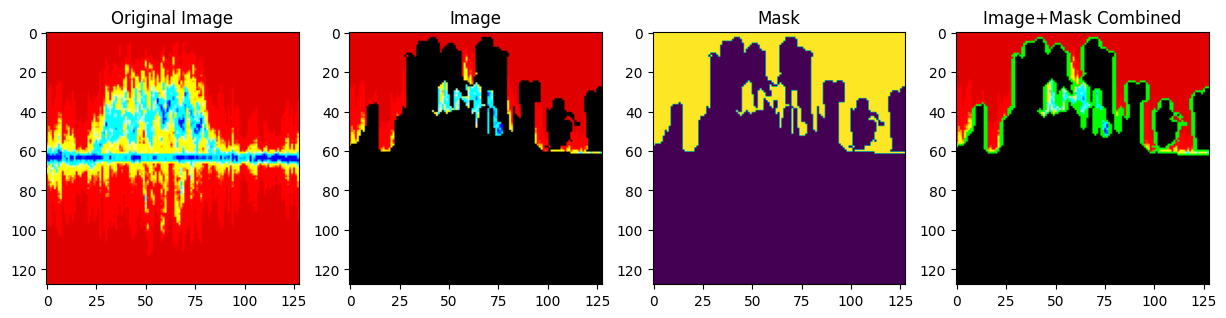

In [42]:
img, mask = explanation.get_image_and_mask(y_test[idx], positive_only=True, hide_rest=True)

img.shape, mask.shape

plot_comparison(x_test[idx], img, mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

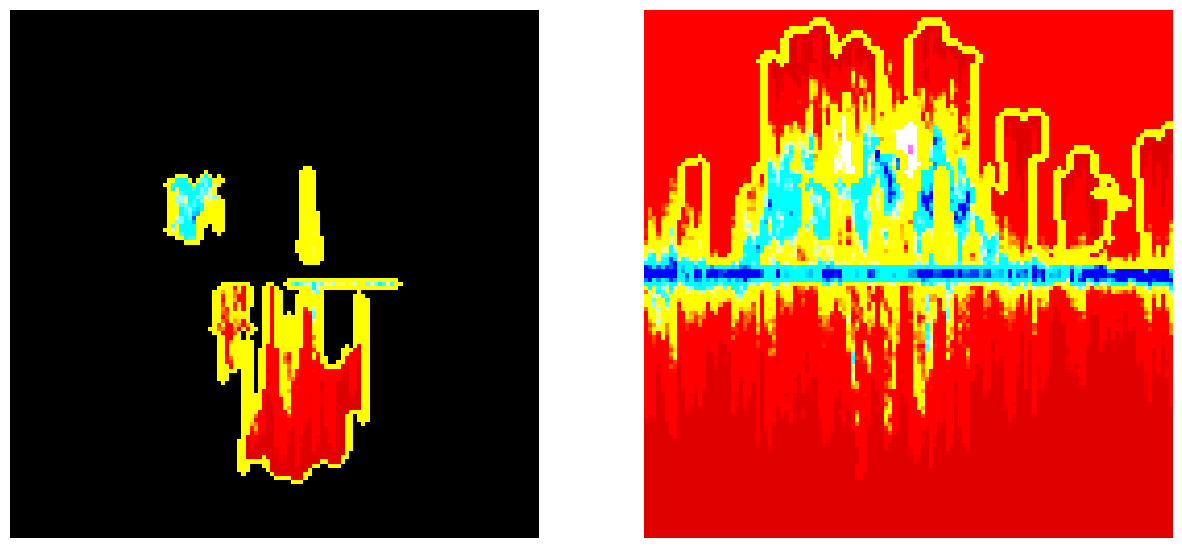

In [43]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')